## Observations and Insights 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [33]:
# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Checking the number of mice.
mice_num = combined['Mouse ID'].nunique()
mice_num

249

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleaned = combined.drop_duplicates(subset=['Mouse ID','Timepoint'])
cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Optional: Get all the data for the duplicate mouse ID. 



In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [38]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_num = cleaned['Mouse ID'].nunique()
cleaned_mice_num

249

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats_dataframe =  pd.DataFrame()

stats_dataframe['Mean Tumor Volume'] = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
stats_dataframe['Median Tumor Volume'] = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
stats_dataframe['Mode Tumor Volume'] = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(pd.Series.mode)
stats_dataframe['Tumor Volume Variance'] = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(ddof = 0)
stats_dataframe['Tumor Standard Error of the Mean'] = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(ddof = 0)

stats_dataframe

,Mean Tumor Volume,Median Tumor Volume,Mode Tumor Volume,Tumor Volume Variance,Tumor Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,45.0,24.839296,0.328629
Ceftamin,52.591172,51.776157,45.0,39.069446,0.468499
Infubinol,52.884795,51.820584,45.0,42.886388,0.490851
Ketapril,55.235638,53.698743,45.0,68.188930,0.602252
Naftisol,54.331565,52.509285,45.0,65.817708,0.594860
Placebo,54.033581,52.288934,45.0,60.830138,0.579722
Propriva,52.393463,50.909965,45.0,42.862273,0.524174
Ramicane,40.216745,40.673236,45.0,23.383692,0.320250
Stelasyn,54.233149,52.431737,45.0,59.122106,0.571526


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats_df = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean, np.median, sts.mode, np.var, 'sem'])
agg_stats_df

,mean,median,mode,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,"([45.0], [25])",24.947764,0.329346
Ceftamin,52.591172,51.776157,"([45.0], [25])",39.290177,0.469821
Infubinol,52.884795,51.820584,"([45.0], [25])",43.128684,0.492236
Ketapril,55.235638,53.698743,"([45.0], [25])",68.553577,0.603860
Naftisol,54.331565,52.509285,"([45.0], [25])",66.173479,0.596466
Placebo,54.033581,52.288934,"([45.0], [25])",61.168083,0.581331
Propriva,52.393463,50.909965,"([45.0], [25])",43.138803,0.525862
Ramicane,40.216745,40.673236,"([45.0], [25])",23.486704,0.320955
Stelasyn,54.233149,52.431737,"([45.0], [24])",59.450562,0.573111


## Bar and Pie Charts

<AxesSubplot:>

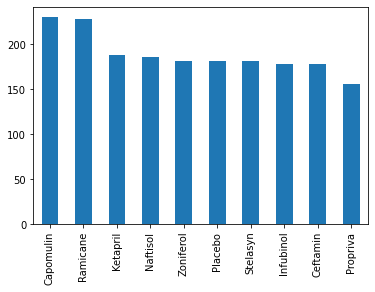

In [68]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice = cleaned['Drug Regimen'].value_counts()
unique_mice.plot(kind = 'bar')

<BarContainer object of 10 artists>

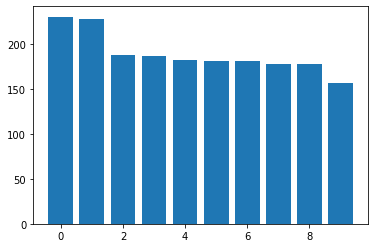

In [43]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(unique_mice))
unique_mice_cts = cleaned['Drug Regimen'].value_counts()

plt.bar(x_axis, unique_mice_cts)

<AxesSubplot:ylabel='Sex'>

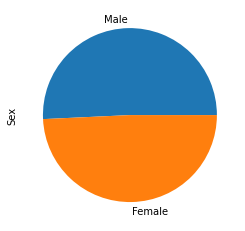

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = cleaned['Sex'].value_counts()
mice_sex.plot(kind = 'pie')

([<matplotlib.patches.Wedge at 0x23fe42f1048>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')])

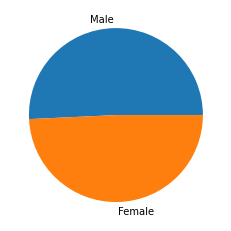

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_genders = cleaned['Sex'].unique()
plt.pie(mice_sex, labels = mice_genders)

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
biggest_timepoint = cleaned.groupby('Mouse ID')['Timepoint'].max()

In [85]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(cleaned, biggest_timepoint, how = 'inner' ,on = ['Mouse ID', 'Timepoint'])
tumor_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [92]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in treatment_list:
    tumor_vol_list.append(tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == treatment])

tumor_vol_list

[    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 1       s185    Capomulin  Female           3          17         45   
 2       x401    Capomulin  Female          16          15         45   
 3       m601    Capomulin    Male          22          17         45   
 6       f966    Capomulin    Male          16          17         20   
 10      u364    Capomulin    Male          18          17         45   
 12      y793    Capomulin    Male          17          17         45   
 13      r554    Capomulin  Female           8          17         45   
 14      m957    Capomulin  Female           3          19         45   
 16      t565    Capomulin  Female          20          17         45   
 20      i738    Capomulin  Female          23          20         45   
 22      w914    Capomulin    Male          24          21         45   
 24      g288    Capomulin    Male           3          19         45   
 28      l897    Capomulin    Male          17     

In [52]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol_df['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
tumor_volumes.append(tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'].mean())
tumor_volumes.append(tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'].mean())
tumor_volumes.append(tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)'].mean())
tumor_volumes.append(tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)'].mean())

print(tumor_volumes)
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


[36.66756771920001, 36.1913904284, 58.1782457852, 57.7539768252]


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
